## Boston Gender with Python!!! 

In [1]:
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt

In [2]:
#import the csv i downloaded from the website with the names -- could robotize this later..
# they have an API https://data.cityofboston.gov/Finance/Employee-Earnings-Report-2015/ah28-sywy


pay_2012 = pd.read_csv("boston_salary_raw_CSV/salary_2012.csv")



In [3]:

pay_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21140 entries, 0 to 21139
Data columns (total 12 columns):
NAME              21140 non-null object
DEPARTMENT        21140 non-null object
TITLE             21140 non-null object
REGULAR           21140 non-null object
RETRO             21140 non-null object
OTHER             21140 non-null object
OVERTIME          21140 non-null object
INJURED           21140 non-null object
DETAIL            21140 non-null object
QUINN             21140 non-null object
TOTAL EARNINGS    21140 non-null object
ZIP               21140 non-null object
dtypes: object(12)
memory usage: 1.9+ MB


In [4]:

pay_2012.head(10)

,NAME,DEPARTMENT,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN,TOTAL EARNINGS,ZIP
0,"Perch,Rhonda N.",Administration and Finance,Admin Secretary,$43646.22,$199.52,$1120.82,$0.00,$0.00,$0.00,$0.00,$44966.56,02124-3735
1,"Harris,Sonya L.",Administration and Finance,Data Proc Systems Analyst,$72115.30,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$72115.30,02124-3722
2,"Gallagher,Anthony J.",Administration and Finance,Exec Asst,$8828.56,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$8828.56,02113-1172
3,"Natoli,John F.",Administration and Finance,Exec Asst (Obpe),$100486.52,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$100486.52,02108-3407
4,"Quirk,Devin Lyons",Administration and Finance,Exec Asst (Obpe),$84853.21,$0.00,$1629.36,$0.00,$0.00,$0.00,$0.00,$86482.57,02129-3728
5,"O'Connor,Elaine",Administration and Finance,Prin Admin Asst,$86606.51,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$86606.51,02132-1743
6,"Frisch,Rebecca A.",Administration and Finance,Special Assistant,$76326.97,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$76326.97,02113-1905
7,"Wilkie,Edna E.",Arts & Cultural Development,Admin Asst,$42099.99,$0.00,$167.35,$0.00,$0.00,$0.00,$0.00,$42267.34,02131-4524
8,"Marshall,Alda",Arts & Cultural Development,Dir Public/Private Partnership,$71221.53,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$71221.53,02124-1911
9,"Cook,Christopher R.",Arts & Cultural Development,Director,$93042.58,$0.00,$1789.28,$0.00,$0.00,$0.00,$0.00,$94831.86,02132-3203


what would I like to do now? for the graphic, I need to genderize, and then pick the top 100 people by pay.
the genderizer uses first name,so I need to make a column of first names..Ill start with the 2016 data set and aim to have this done soon to update my graphic...
...Ill have to experiment a bit with the genderizer so will pull out 20 names to test them..

In [5]:
df = pay_2012

df.head()

,NAME,DEPARTMENT,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN,TOTAL EARNINGS,ZIP
0,"Perch,Rhonda N.",Administration and Finance,Admin Secretary,$43646.22,$199.52,$1120.82,$0.00,$0.00,$0.00,$0.00,$44966.56,02124-3735
1,"Harris,Sonya L.",Administration and Finance,Data Proc Systems Analyst,$72115.30,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$72115.30,02124-3722
2,"Gallagher,Anthony J.",Administration and Finance,Exec Asst,$8828.56,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$8828.56,02113-1172
3,"Natoli,John F.",Administration and Finance,Exec Asst (Obpe),$100486.52,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$100486.52,02108-3407
4,"Quirk,Devin Lyons",Administration and Finance,Exec Asst (Obpe),$84853.21,$0.00,$1629.36,$0.00,$0.00,$0.00,$0.00,$86482.57,02129-3728


In [6]:
#do I need to make sure other stuff is string?
#do I need to make sure other stuff is string?

df['REGULAR'] = (df['REGULAR'].replace( '[\$,)]','', regex=True ).astype(float)).round()
df['RETRO'] = (df['RETRO'].replace( '[\$,)]','', regex=True ).astype(float)).round()
df['OTHER'] = (df['OTHER'].replace( '[\$,)]','', regex=True ).astype(float)).round()
df['OVERTIME'] = (df['OVERTIME'].replace( '[\$,)]','', regex=True ).astype(float)).round()
df['INJURED'] = (df['INJURED'].replace( '[\$,)]','', regex=True ).astype(float)).round()
#idetail wont change so removing
#df['DETAIL'] = (df['DETAIL'].replace( '[\$,)]','', regex=True ).astype(float)).round()
#df its just Quinn, not quinn/edu has in 2015 2016
df['QUINN'] = (df['QUINN'].replace( '[\$,)]','', regex=True ).astype(float)).round()
df['TOTAL EARNINGS'] = (df['TOTAL EARNINGS'].replace( '[\$,)]','', regex=True ).astype(float)).round()


In [7]:

df = df.rename(columns = {
'REGULAR':"salary",
'RETRO':"retroactive",
'OTHER':'other',
'OVERTIME':'overtime',
'DETAIL':'detail',
'INJURED':'injured',
'QUINN':'quinn_education_incentive',
'TOTAL EARNINGS':'totalSalary',
'NAME':'name',
"DEPARTMENT" : "dept",
"TITLE" : "title",
"ZIP" : "zip_code",
    
    
})



In [8]:
df.head()

,name,dept,title,salary,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,totalSalary,zip_code
0,"Perch,Rhonda N.",Administration and Finance,Admin Secretary,43646.0,200.0,1121.0,0.0,0.0,$0.00,0.0,44967.0,02124-3735
1,"Harris,Sonya L.",Administration and Finance,Data Proc Systems Analyst,72115.0,0.0,0.0,0.0,0.0,$0.00,0.0,72115.0,02124-3722
2,"Gallagher,Anthony J.",Administration and Finance,Exec Asst,8829.0,0.0,0.0,0.0,0.0,$0.00,0.0,8829.0,02113-1172
3,"Natoli,John F.",Administration and Finance,Exec Asst (Obpe),100487.0,0.0,0.0,0.0,0.0,$0.00,0.0,100487.0,02108-3407
4,"Quirk,Devin Lyons",Administration and Finance,Exec Asst (Obpe),84853.0,0.0,1629.0,0.0,0.0,$0.00,0.0,86483.0,02129-3728


In [9]:
#the csv used for d3(v3) jsI want to update has this: columns are name, 
#firstName, dept, salary, totalSalary(still has $), gender -- is just F or M 

here i want to sort on the salary and then cut off at the first 200 to not use too much of teh API right now..$9 dolalrs!!!! 

In [10]:
#sort on salaries 
df = df.sort_values('salary', ascending=False)


had to do the splitting off of first name in two steps that probably should be one so can review later..below might help

#see this
#https://stackoverflow.com/questions/29585106/pandas-how-to-split-twice-a-given-field
 #try this:
trimmed_list = [i.replace('.', ',').split(',') for i in sbj[0].tolist() if i != ""]
item_list = [item.strip(whitespace) for item in itertools.chain(*trimmed_list)]
item_count = Counter(item_list)


In [11]:
df['firstName'] = df.name.apply(lambda x: x.split(',')[1])
df.head(5)

,name,dept,title,salary,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,totalSalary,zip_code,firstName
8886,"Johnson,Carol R",Boston Public Schools,Superintendent,266750.0,0.0,56972.0,0.0,0.0,$0.00,0.0,323722.0,02129-4233,Carol R
5500,"Shea,Bartholomew J",Boston Fire Department,Dep Fire Chief Administration,181156.0,0.0,9526.0,7316.0,0.0,$0.00,0.0,197998.0,02132-1863,Bartholomew J
8977,"McDonough,John P",Boston Public Schools,Chief Financial Officer,177188.0,0.0,3330.0,0.0,0.0,$0.00,0.0,180518.0,02130-3451,John P
4633,"Fontana,Gerard T.",Boston Fire Department,Dep Fire Chief Administration,175697.0,0.0,13345.0,16883.0,0.0,$0.00,0.0,205925.0,02169-2417,Gerard T.
4710,"Granara,David Richard",Boston Fire Department,Dep Fire Chief Administration,175428.0,0.0,10456.0,3422.0,0.0,$0.00,0.0,189305.0,02128-1084,David Richard


In [12]:
df['firstName'] = df.firstName.apply(lambda x: x.split(' ')[0])
df.head(5)



,name,dept,title,salary,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,totalSalary,zip_code,firstName
8886,"Johnson,Carol R",Boston Public Schools,Superintendent,266750.0,0.0,56972.0,0.0,0.0,$0.00,0.0,323722.0,02129-4233,Carol
5500,"Shea,Bartholomew J",Boston Fire Department,Dep Fire Chief Administration,181156.0,0.0,9526.0,7316.0,0.0,$0.00,0.0,197998.0,02132-1863,Bartholomew
8977,"McDonough,John P",Boston Public Schools,Chief Financial Officer,177188.0,0.0,3330.0,0.0,0.0,$0.00,0.0,180518.0,02130-3451,John
4633,"Fontana,Gerard T.",Boston Fire Department,Dep Fire Chief Administration,175697.0,0.0,13345.0,16883.0,0.0,$0.00,0.0,205925.0,02169-2417,Gerard
4710,"Granara,David Richard",Boston Fire Department,Dep Fire Chief Administration,175428.0,0.0,10456.0,3422.0,0.0,$0.00,0.0,189305.0,02128-1084,David


In [13]:
#make a shorter df so as to not genderize so many -- ill do 500
df_top_500 = df.head(500)

In [14]:
df_top_500.tail()

,name,dept,title,salary,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,totalSalary,zip_code,firstName
18211,"Sullivan,Richard",Boston Public Schools,Asst Headmaster,109482.0,0.0,6000.0,0.0,0.0,$0.00,0.0,115482.0,02026-6408,Richard
17635,"Battle-Grady,Rosalind T",Boston Public Schools,Teacher,109398.0,0.0,420.0,0.0,0.0,$0.00,0.0,109818.0,02121-1309,Rosalind
9111,"Sullivan,Dolores A.",Boston Public Schools,Unit Leader (C),109393.0,0.0,2026.0,0.0,0.0,$0.00,0.0,111419.0,02026-6408,Dolores
4938,"Kelly,Sean F",Boston Fire Department,Fire Lieutenant-Technician,109385.0,0.0,2467.0,14163.0,0.0,$148.00,0.0,126163.0,02050-4732,Sean
4427,"Curley,Kevin J",Boston Fire Department,Fire Lieutenant,109335.0,0.0,2469.0,13843.0,0.0,$0.00,0.0,125648.0,02186-4127,Kevin


create a column called gender

In [17]:
#genderize using my API key , $9!!!!!
from genderize import Genderize
genderize = Genderize(
    user_agent='GenderizeDocs/0.0',
    api_key='08402238f4c2af82034ed0a16e4d36cb')

In [19]:
#df2['gender_try2'] = genderize.get(df2['name'],country_id='US')
df_top_500['genderize_results'] = genderize.get(df_top_500['firstName'],country_id='US')

/Users/hw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
df_top_500.head(5)

,name,dept,title,salary,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,totalSalary,zip_code,firstName,genderize_results
8886,"Johnson,Carol R",Boston Public Schools,Superintendent,266750.0,0.0,56972.0,0.0,0.0,$0.00,0.0,323722.0,02129-4233,Carol,"{'name': 'Carol', 'gender': 'female', 'probabi..."
5500,"Shea,Bartholomew J",Boston Fire Department,Dep Fire Chief Administration,181156.0,0.0,9526.0,7316.0,0.0,$0.00,0.0,197998.0,02132-1863,Bartholomew,"{'name': 'Bartholomew', 'gender': 'male', 'pro..."
8977,"McDonough,John P",Boston Public Schools,Chief Financial Officer,177188.0,0.0,3330.0,0.0,0.0,$0.00,0.0,180518.0,02130-3451,John,"{'name': 'John', 'gender': 'male', 'probabilit..."
4633,"Fontana,Gerard T.",Boston Fire Department,Dep Fire Chief Administration,175697.0,0.0,13345.0,16883.0,0.0,$0.00,0.0,205925.0,02169-2417,Gerard,"{'name': 'Gerard', 'gender': 'male', 'probabil..."
4710,"Granara,David Richard",Boston Fire Department,Dep Fire Chief Administration,175428.0,0.0,10456.0,3422.0,0.0,$0.00,0.0,189305.0,02128-1084,David,"{'name': 'David', 'gender': 'male', 'probabili..."


grab the gender only from the genderize column and add it as a column

In [21]:
gender1 = []

for item in df_top_500['genderize_results']:
    gender_id = item['gender']
    gender1.append(gender_id)
    
df_top_500["gender"] = gender1
df_top_500.head(4)

/Users/hw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,name,dept,title,salary,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,totalSalary,zip_code,firstName,genderize_results,gender
8886,"Johnson,Carol R",Boston Public Schools,Superintendent,266750.0,0.0,56972.0,0.0,0.0,$0.00,0.0,323722.0,02129-4233,Carol,"{'name': 'Carol', 'gender': 'female', 'probabi...",female
5500,"Shea,Bartholomew J",Boston Fire Department,Dep Fire Chief Administration,181156.0,0.0,9526.0,7316.0,0.0,$0.00,0.0,197998.0,02132-1863,Bartholomew,"{'name': 'Bartholomew', 'gender': 'male', 'pro...",male
8977,"McDonough,John P",Boston Public Schools,Chief Financial Officer,177188.0,0.0,3330.0,0.0,0.0,$0.00,0.0,180518.0,02130-3451,John,"{'name': 'John', 'gender': 'male', 'probabilit...",male
4633,"Fontana,Gerard T.",Boston Fire Department,Dep Fire Chief Administration,175697.0,0.0,13345.0,16883.0,0.0,$0.00,0.0,205925.0,02169-2417,Gerard,"{'name': 'Gerard', 'gender': 'male', 'probabil...",male


change the order of the columns


In [22]:
cols = list(df_top_500.columns.values)
cols

['name',
 'dept',
 'title',
 'salary',
 'retroactive',
 'other',
 'overtime',
 'injured',
 'DETAIL ',
 'quinn_education_incentive',
 'totalSalary',
 'zip_code',
 'firstName',
 'genderize_results',
 'gender']

In [23]:
#detail is still messed up here but dont use anyway

df_top_500 = df_top_500[[
 'name',
'firstName',
 'gender',
 'salary',
'totalSalary',
'dept',
 'title',
'genderize_results',
 'retroactive',
 'other',
 'overtime',
 'injured',
 'DETAIL ',
 'quinn_education_incentive',
 'zip_code', 
 ]]
df_top_500.head()

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,zip_code
8886,"Johnson,Carol R",Carol,female,266750.0,323722.0,Boston Public Schools,Superintendent,"{'name': 'Carol', 'gender': 'female', 'probabi...",0.0,56972.0,0.0,0.0,$0.00,0.0,02129-4233
5500,"Shea,Bartholomew J",Bartholomew,male,181156.0,197998.0,Boston Fire Department,Dep Fire Chief Administration,"{'name': 'Bartholomew', 'gender': 'male', 'pro...",0.0,9526.0,7316.0,0.0,$0.00,0.0,02132-1863
8977,"McDonough,John P",John,male,177188.0,180518.0,Boston Public Schools,Chief Financial Officer,"{'name': 'John', 'gender': 'male', 'probabilit...",0.0,3330.0,0.0,0.0,$0.00,0.0,02130-3451
4633,"Fontana,Gerard T.",Gerard,male,175697.0,205925.0,Boston Fire Department,Dep Fire Chief Administration,"{'name': 'Gerard', 'gender': 'male', 'probabil...",0.0,13345.0,16883.0,0.0,$0.00,0.0,02169-2417
4710,"Granara,David Richard",David,male,175428.0,189305.0,Boston Fire Department,Dep Fire Chief Administration,"{'name': 'David', 'gender': 'male', 'probabili...",0.0,10456.0,3422.0,0.0,$0.00,0.0,02128-1084


now I'd like to see how many there are of each type in the new gender column...

In [24]:
df_top_500['gender'].value_counts() 

male      333
female    150
Name: gender, dtype: int64

SO 483 GOT COUNTED OUT OF 500 

In [25]:
df_top_500.count() 

name                         500
firstName                    500
gender                       483
salary                       500
totalSalary                  500
dept                         500
title                        500
genderize_results            500
retroactive                  500
other                        500
overtime                     500
injured                      500
DETAIL                       500
quinn_education_incentive    500
zip_code                     500
dtype: int64

In [26]:
df_top_500['gender'].head(100).value_counts() 
#TOP 100 IS 100 out of 100

male      87
female    13
Name: gender, dtype: int64

these two women WERE listed as unknowns with prior gender filter, so Ill looked them up 
13129          McCreary,Makeeba   Makeeba                 Communications   
6050   Edouard-Vincent,Marice M    Marice  Asst Superintendent-Network A 

In [27]:
df_top_500[df_top_500['name'].str.contains(r"\bMakeeba\b", case = False)]

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,zip_code


In [28]:
df_top_500[df_top_500['name'].str.contains(r"\bMarice\b", case = False)]

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,zip_code
15956,"Edouard-Vincent,Marice M",Marice,male,128270.0,128270.0,Boston Public Schools,Principal Elementary,"{'name': 'Marice', 'gender': 'male', 'probabil...",0.0,0.0,0.0,0.0,$0.00,0.0,02136-3419


Marice should be a woman, since I looked her and makeeba up im going to fix in the data set..
13129          McCreary,Makeeba   Makeeba                 Communications   
6050   Edouard-Vincent,Marice M    Marice  Asst Superintendent-Network A 

In [29]:
df_top_500.loc[df_top_500['name'] == "Edouard-Vincent,Marice M", "gender"] = "female"

In [30]:
df_top_500[df_top_500['name'].str.contains(r"\bKamalkant\b", case = False)]

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,zip_code
10017,"Chavda,Kamalkant A",Kamalkant,None,127825.0,127825.0,Boston Public Schools,Director (E) (non-ac),"{'name': 'Kamalkant', 'gender': None}",0.0,0.0,0.0,0.0,$0.00,0.0,03290-5824


In [31]:
#according to web lookup chavda is a male
df_top_500.loc[df_top_500['name'] == "Chavda,Kamalkant A", "gender"] = "male"

In [32]:
df_top_500['gender'].head(100).value_counts() 

male      87
female    13
Name: gender, dtype: int64

find row where gender is not male or female

In [33]:
#https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
#df.loc[df['column_name'] == some_value] To select rows whose column value does not equal some_value, use !=:
check = df_top_500.head(100)
genders = ["male","female"]

check.loc[~check['gender'].isin(genders)]

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,zip_code


In [34]:
#queon is a guy
df_top_500.loc[df_top_500['firstName'] == "Queon", "gender"] = "male"



In [35]:
df_top_500['gender'].value_counts() 
#now its 100 / 100

male      334
female    151
Name: gender, dtype: int64

McCreary - F
https://www.bostonpublicschools.org/site/default.aspx?PageType=3&ModuleInstanceID=9715&ViewID=7b97f7ed-8e5e-4120-848f-a8b4987d588f&RenderLoc=0&FlexDataID=7541&PageID=4853

 Edouard-Vincent,Marice - F
https://twitter.com/netsuptb?lang=en

McGovern,Ryan J -- M
http://www.firehouse.com/news/11252963/after-falling-through-floor-boston-firefighter-thankful-for-minor-injuries

Franklin-Hodge,Jascha -- M
https://www.boston.gov/departments/innovation-and-technology/jascha-franklin-hodge

  Nee,Kelly A  -- F
https://www.youtube.com/watch?v=2x7OrSKi_04

 Driscoll,Mary E      Mary  Asst Superintendent-Network A - F
 https://www.bc.edu/schools/csom/lynchacademy/alumni/2012/Driscoll.html
 
  Hung,Kelly M     Kelly  Asst Superintendent-Network A  153503.93 -- F
  
  https://www.bc.edu/schools/csom/lynchacademy/alumni/2014/KHung.html
  
  Queon, Jackson - male https://www.bostonglobe.com/metro/2016/08/05/paid-leave-dragged-years-former-boston-headmaster-collected/E5kOej6eS7LOeBC40IVkfO/story.html

In [36]:
df_top_500['gender'].value_counts()

male      334
female    151
Name: gender, dtype: int64

In [37]:
df_top_500.dtypes


name                          object
firstName                     object
gender                        object
salary                       float64
totalSalary                  float64
dept                          object
title                         object
genderize_results             object
retroactive                  float64
other                        float64
overtime                     float64
injured                      float64
DETAIL                        object
quinn_education_incentive    float64
zip_code                      object
dtype: object

In [41]:
print(df_top_500.shape)



(500, 15)


In [42]:
#this is a repeat from earlier but can't hurt 
salarySorted = df_top_500.sort_values(by='salary', ascending=False)
salarySorted.head()




,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,zip_code
8886,"Johnson,Carol R",Carol,female,266750.0,323722.0,Boston Public Schools,Superintendent,"{'name': 'Carol', 'gender': 'female', 'probabi...",0.0,56972.0,0.0,0.0,$0.00,0.0,02129-4233
5500,"Shea,Bartholomew J",Bartholomew,male,181156.0,197998.0,Boston Fire Department,Dep Fire Chief Administration,"{'name': 'Bartholomew', 'gender': 'male', 'pro...",0.0,9526.0,7316.0,0.0,$0.00,0.0,02132-1863
8977,"McDonough,John P",John,male,177188.0,180518.0,Boston Public Schools,Chief Financial Officer,"{'name': 'John', 'gender': 'male', 'probabilit...",0.0,3330.0,0.0,0.0,$0.00,0.0,02130-3451
4633,"Fontana,Gerard T.",Gerard,male,175697.0,205925.0,Boston Fire Department,Dep Fire Chief Administration,"{'name': 'Gerard', 'gender': 'male', 'probabil...",0.0,13345.0,16883.0,0.0,$0.00,0.0,02169-2417
4710,"Granara,David Richard",David,male,175428.0,189305.0,Boston Fire Department,Dep Fire Chief Administration,"{'name': 'David', 'gender': 'male', 'probabili...",0.0,10456.0,3422.0,0.0,$0.00,0.0,02128-1084


In [43]:
#make csv with just the earlier data columns ie 6 of them newdf = df[(df['column_one']>2004) & (df['column_two']==9)]
#AND JUST PICK THE TOP 100 
shortForCsv = salarySorted[["name", "firstName","dept", "salary", "totalSalary","gender"]].head(100)

shortForCsv['gender'].value_counts()



male      87
female    13
Name: gender, dtype: int64

In [44]:
shortForCsv["dept"].value_counts() 

Boston Fire Department            59
Boston Police Department          18
Boston Public Schools             13
Mayor's Office                     3
Law Department                     2
Assessing Department               1
Property Management                1
Treasury-Treasury Division         1
Boston Public Library              1
Dpt of Innovation & Technology     1
Name: dept, dtype: int64

In [45]:
test = shortForCsv[(shortForCsv['dept']== "Fam & Student Engagemt")]
test1 = shortForCsv[(shortForCsv['dept']== "Achievement Gap")]
test2 = shortForCsv[(shortForCsv['dept']== "Kennedy, EM Health Academy")]

test



,name,firstName,dept,salary,totalSalary,gender


grouping the departments so its easier to see that these variously named roles are part of school system or mayors office, etc, though need to do more for mayors office grouping

perhaps treasury and inovation tech shoud be grouped into mayors office

In [46]:
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network A", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Special Education", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Fam & Student Engagemt", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Achievement Gap", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Kennedy, EM Health Academy", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Human Resource Team", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Superintendent", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network G", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network B", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Boston Latin", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network E", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network F", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network D", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Equity", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS English High", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Murphy Elementary", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Brighton High", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Law Department", "dept"] = "Law"
shortForCsv.loc[shortForCsv['dept'] == "Dpt of Innovation & Technology", "dept"] = "Innovation & Technology"







In [47]:
shortForCsv["dept"].value_counts()

Boston Fire Department        59
Boston Police Department      18
Boston Public Schools         13
Mayor's Office                 3
Law                            2
Assessing Department           1
Property Management            1
Treasury-Treasury Division     1
Innovation & Technology        1
Boston Public Library          1
Name: dept, dtype: int64

In [48]:
df_top_500["dept"].value_counts()

Boston Public Schools             212
Boston Fire Department            178
Boston Police Department           50
Dpt of Innovation & Technology      8
Public Works Department             6
Transportation Department           6
Mayor's Office                      5
Boston Public Library               4
ASD Human Resources                 3
Law Department                      3
Assessing Department                3
Inspectional Services Dept          3
Property Management                 2
Treasury-Treasury Division          2
Parks Department                    2
ASD Intergvernmtl Relations         2
State Boston Retirement Syst        2
Neighborhood Development            2
ASD Office of Budget Mangmnt        2
Auditing Department                 1
Administration and Finance          1
ASD Office Of Labor Relation        1
ASD Purchasing Division             1
Boston Cntr - Youth & Families      1
Name: dept, dtype: int64

In [49]:
df_top_500['gender'].value_counts() 
# men outnumer women about 2 to 1 in top 500
# DOESNT  ADD UP TO 500

male      334
female    151
Name: gender, dtype: int64

In [50]:
print(shortForCsv)

                           name    firstName                      dept  \
8886            Johnson,Carol R        Carol     Boston Public Schools   
5500         Shea,Bartholomew J  Bartholomew    Boston Fire Department   
8977           McDonough,John P         John     Boston Public Schools   
4633          Fontana,Gerard T.       Gerard    Boston Fire Department   
4710      Granara,David Richard        David    Boston Fire Department   
1259                 Ryan,Amy E          Amy     Boston Public Library   
2209           Menino,Thomas M.       Thomas            Mayor's Office   
4648      Fraser Jr.,Roderick J     Roderick    Boston Fire Department   
6367             Davis,Edward F       Edward  Boston Police Department   
4381            Coppney,John T.         John    Boston Fire Department   
4774                Hasson,John         John    Boston Fire Department   
5116          McDevitt,Daniel J       Daniel    Boston Fire Department   
5620           Tully,Bernard J.      B

In [51]:
shortForCsv.to_csv("top100_2012", index=False)

In [52]:
#Get a sense of how many missing values there are in the dataframe.
np.sum([df_top_500.salary.isnull()])
np.sum([df_top_500.gender.isnull()])

15

In [53]:
b = df_top_500[(df_top_500['dept']== "Superintendent")]
b
#could check to see if all these people are in BPS to change the category overall..

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,DETAIL,quinn_education_incentive,zip_code


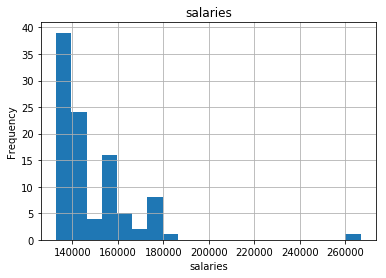

In [54]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

shortForCsv.salary.hist(bins=20)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();



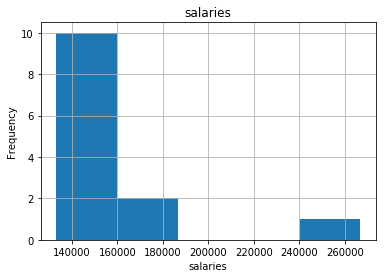

In [55]:

shortForCsv[shortForCsv.gender == "female"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();




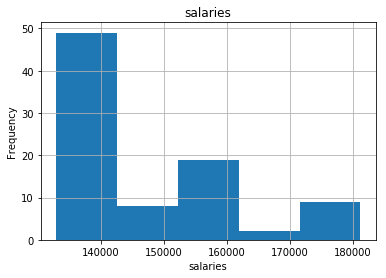

In [56]:
shortForCsv[shortForCsv.gender == "male"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();



